Autor: Thomas Fetter
 # 1. 📘 Was sind Fraktale?



Fraktale sind geometrische Objekte, die in faszinierender Weise **selbstähnlich** sind. 
Vergrößert man einen Ausschnitt des Fraktals, erkennt man ähnliche oder sogar identische Strukturen wie im Gesamtbild.

Fraktale treten häufig **in der Natur** auf, z. B. bei:

- Farnblättern 🌿
- Schneeflocken ❄️
- Küstenlinien 🌊
- Wolken ☁️
- burning ship

---

## Beispielbilder

<table>
<tr>
<td><img src="img/farn50.gif" width="200"></td>
<td><img src="bilder/schneeflocke.jpg" width="200"></td>
<td><img src="bilder/küste.jpg" width="200"></td>
</tr>
<tr>
<td>Farnblatt</td>
<td>Schneeflocke</td>
<td>Küstenlinie</td>
</tr>
</table>

# 2. Mathematische Eigenschaften von Fraktalen

Fraktale lassen sich mathematisch durch folgende Eigenschaften charakterisieren:

---

### 🔁 1. Selbstähnlichkeit

Ein Objekt ist **selbstähnlich**, wenn es in seinen Teilstrukturen eine Kopie oder Variation seiner Gesamtheit enthält.

Formal heißt das:  
Ein Fraktal $F$ ist selbstähnlich, wenn es eine Zerlegung

$$
F = \bigcup_{i=1}^n S_i(F)
$$

gibt, wobei $S_i$ Ähnlichkeitsabbildungen (z. B. Skalierung, Drehung, Verschiebung) sind.

---

### 🔄 2. Rekursive Konstruktion

Viele Fraktale entstehen durch die **wiederholte Anwendung einer einfachen Regel**.

Beispiel: Die **Koch-Kurve** wird rekursiv aus einem Liniensegment erzeugt, indem man in jedem Schritt das mittlere Drittel durch zwei Seiten eines gleichseitigen Dreiecks ersetzt.

---

### 📐 3. Nicht-ganzzahlige (fraktale) Dimension

Die sogenannte **fraktale Dimension** beschreibt, wie „komplex“ oder „gefüllt“ ein Objekt ist – oft liegt sie **zwischen zwei ganzzahligen Dimensionen**.

Beispiel:
- Eine Linie hat Dimension 1
- Eine Fläche hat Dimension 2
- Die Koch-Kurve hat eine fraktale Dimension von etwa $D \approx 1{,}2619$

Ein häufig verwendetes Maß ist die **Box-Counting-Dimension**:

$$
D = \lim_{\varepsilon \to 0} \frac{\log N(\varepsilon)}{\log(1/\varepsilon)}
$$

Dabei ist $N(\varepsilon)$ die Anzahl an Quadraten (Boxen) der Seitenlänge $\varepsilon$, die nötig sind, um das Objekt vollständig zu bedecken.

---

### 📏 4. Unendlicher Umfang, endlicher Flächeninhalt

Ein weiteres typisches Merkmal vieler Fraktale ist, dass sie einen **unendlichen Umfang**, aber dennoch einen **endlichen Flächeninhalt** besitzen.

Beispiel: Die **Koch-Kurve**

- In jeder Iteration wird die Gesamtlänge der Kurve um den Faktor $\frac{4}{3}$ multipliziert.
- Daraus ergibt sich nach $n$ Iterationen eine Länge von:

$$
L_n = L_0 \cdot \left(\frac{4}{3}\right)^n
$$

→ Für $n \to \infty$ wächst $L_n$ gegen **unendlich**.

Trotzdem bleibt die Kurve innerhalb eines endlichen Bereichs, d. h. der **eingeschlossene Raum (Fläche)** ist **endlich**.

Diese Eigenschaft macht Fraktale auch aus physikalischer Sicht interessant – sie zeigen, dass eine **begrenzte Fläche** eine **unendlich lange Grenze** besitzen kann.

---

In den folgenden Abschnitten betrachten wir konkrete Fraktale und analysieren sie unter diesen mathematischen Gesichtspunkten.

## 3. Koch Curve – Recursive Construction and Fractal Geometry

The **Koch curve** is a classical fractal constructed by recursively replacing line segments with a specific geometric pattern.

---

### 3.1 Geometric Construction

1. Start with a line segment of unit length.
2. Divide it into 3 equal parts.
3. Replace the middle third with two sides of an equilateral triangle (pointing outward).
4. Repeat the process recursively for each new segment.

After each iteration:
- The number of segments increases by a factor of 4
- Each segment becomes 1/3 the length of the previous

---

### 3.2 Recursive Definition

Let $L_0$ be the initial segment.  
At iteration step $n$, the curve consists of:

- $N_n = 4^n$ segments
- Each of length $\ell_n = \left(\frac{1}{3}\right)^n$

So the total length after $n$ steps is:

$$
L_n = N_n \cdot \ell_n = 4^n \cdot \left(\frac{1}{3}\right)^n = \left( \frac{4}{3} \right)^n \to \infty
$$

$\Rightarrow$ The curve has **infinite length**, but remains within a **bounded area**.

---

### 3.3 Fractal Dimension

We can compute the **similarity dimension** $D$ using the relation:

$$
N = r^{-D} \quad \Rightarrow \quad D = \frac{\log N}{\log (1/r)}
$$

For the Koch curve:
- $N = 4$ self-similar parts
- Each scaled by $r = 1/3$

Therefore:

$$
D = \frac{\log 4}{\log 3} \approx 1.2619
$$

This means the Koch curve is **more complex than a line (1D)**  
but does **not fill an area (2D)**.

interactive(children=(IntSlider(value=0, description='Iterationen', max=7), Output()), _dom_classes=('widget-i…

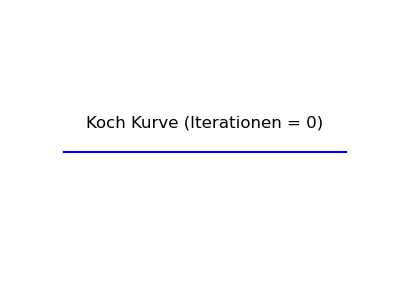

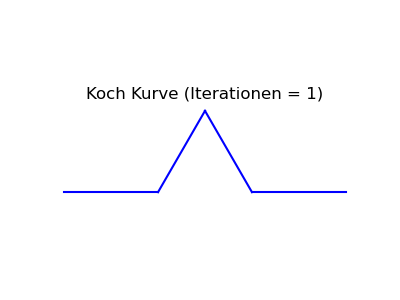

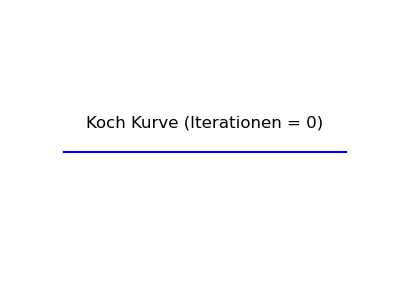

In [2]:
# Der %matplotlib-Magic-Command steuert, wie Matplotlib-Plots im Notebook angezeigt werden.
# So wird das interaktive Backend auf Basis von ipympl aktiviert.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets    #needed for scroll bar removal

from ipywidgets import interact, IntSlider
from IPython.display import clear_output, display

# === Namespace für Kochkurve ===
class koch:
    @staticmethod
    def draw_segment(p1, p2, depth, ax):
        if depth == 0:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='blue')
            return

        x1, y1 = p1 #Anfangspunkt
        x5, y5 = p2 #Endpunkt
        dx = (x5 - x1) / 3
        dy = (y5 - y1) / 3

        x2, y2 = x1 + dx, y1 + dy
        x3 = ((x1 + x5) / 2 + np.sqrt(3) * (y1 - y5) / 6,
              (y1 + y5) / 2 + np.sqrt(3) * (x5 - x1) / 6)
        x4, y4 = x1 + 2 * dx, y1 + 2 * dy

        koch.draw_segment((x1, y1), (x2, y2), depth - 1, ax)
        koch.draw_segment((x2, y2), x3, depth - 1, ax)
        koch.draw_segment(x3, (x4, y4), depth - 1, ax)
        koch.draw_segment((x4, y4), (x5, y5), depth - 1, ax)

    @staticmethod
    def plot(depth):
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
        koch.draw_segment((0, 0), (1, 0), depth, ax)
        
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"Koch Kurve (Iterationen = {depth})")
        display(fig)

# === Interaktiver Aufruf ===
interact(koch.plot, depth=IntSlider(min=0, max=7, step=1, value=0, description="Iterationen"));


interactive(children=(IntSlider(value=0, description='depth', max=7), Output()), _dom_classes=('widget-interac…

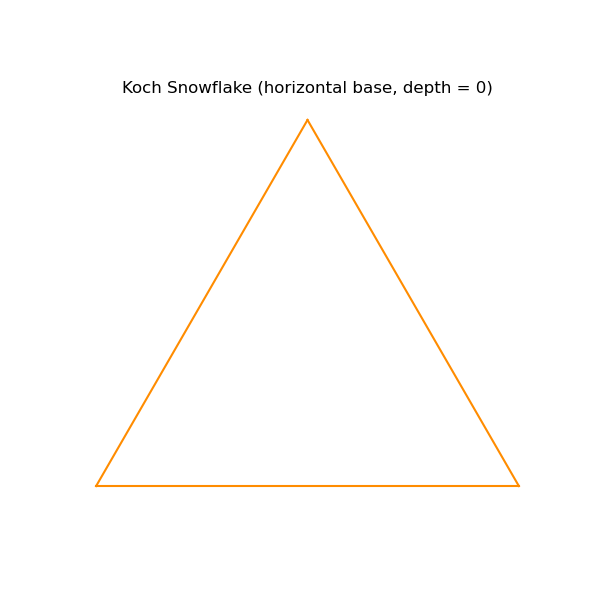

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
from IPython.display import clear_output, display

# === Namespace für geschlossene Koch-Schneeflocke ===
class kochflake:
    @staticmethod
    def draw_edge(p1, p2, depth, ax):
        if depth == 0:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='darkorange')
            return

        x1, y1 = p1
        x5, y5 = p2
        dx = (x5 - x1) / 3
        dy = (y5 - y1) / 3

        x2, y2 = x1 + dx, y1 + dy
        x3 = ((x1 + x5) / 2 + np.sqrt(3) * (y1 - y5) / 6,
              (y1 + y5) / 2 + np.sqrt(3) * (x5 - x1) / 6)
        x4, y4 = x1 + 2 * dx, y1 + 2 * dy

        kochflake.draw_edge((x1, y1), (x2, y2), depth - 1, ax)
        kochflake.draw_edge((x2, y2), x3, depth - 1, ax)
        kochflake.draw_edge(x3, (x4, y4), depth - 1, ax)
        kochflake.draw_edge((x4, y4), (x5, y5), depth - 1, ax)

    @staticmethod
    def plot(depth):
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

        # Winkel so angepasst, dass Basis unten horizontal liegt
        angles = np.deg2rad([90, -30, 210])
        base_points = [(np.cos(a), np.sin(a)) for a in angles]
        base_points.append(base_points[0])  # zum Schließen

        for i in range(3):
            kochflake.draw_edge(base_points[i], base_points[i+1], depth, ax)

        ax.set_title(f"Koch Snowflake (horizontal base, depth = {depth})")
        ax.set_aspect('equal')
        ax.axis('off')
        display(fig)

# === Interaktiver Aufruf ===
interact(kochflake.plot, depth=IntSlider(min=0, max=7, step=1, value=0));

### 3.4 Analytical Properties of the Koch Curve

Let us denote:

- $n$ = number of iterations (recursion depth)
- $N_n$ = number of segments at iteration $n$
- $\ell_n$ = length of each segment at iteration $n$
- $L_n$ = total length of the curve at iteration $n$

---

#### 1. Number of segments

At each step, every line segment is replaced by **4 new segments**:

$$
N_n = 4^n
$$

---

#### 2. Length of each segment

Each new segment is exactly **one third** the length of the previous:

$$
\ell_n = \left(\frac{1}{3}\right)^n
$$

---

#### 3. Total length of the curve

Total length after $n$ steps:

$$
L_n = N_n \cdot \ell_n = 4^n \cdot \left( \frac{1}{3} \right)^n = \left( \frac{4}{3} \right)^n
$$

This means:

- The total length **increases exponentially**
- $\lim\limits_{n \to \infty} L_n = \infty$

So, the Koch curve has **infinite length**, even though it is contained within a **finite region** of the plane.

---

#### 4. Fractal Dimension (Similarity Dimension)

We use the formula for self-similar objects:

$$
D = \frac{\log N}{\log (1/r)}
$$

Where:

- $N = 4$ parts
- $r = 1/3$ scaling factor

So:

$$
D = \frac{\log 4}{\log 3} \approx 1.2619
$$

This dimension lies strictly between 1 and 2.  
It is **not enough to describe the curve as a line**, but it also **does not fill an area**.

### 3.5 Why the Koch Curve is not a "Line" in the Classical Sense

At first glance, the Koch curve appears to be just a jagged line.  
It is **continuous**, and you can trace it from start to end without lifting your pen.

However, mathematically it behaves **very differently** from a normal line segment:

---

#### 1. Infinite Length

The length of the curve increases with each iteration as:

$$
L_n = \left( \frac{4}{3} \right)^n
$$

Thus:

$$
\lim_{n \to \infty} L_n = \infty
$$

Despite being contained in a finite region, the curve has **infinite perimeter**.

---

#### 2. No Tangents

The curve becomes **infinitely "kinked"**, with new corners introduced at every scale.

This means:

- The curve is **nowhere differentiable**
- There is **no well-defined slope** at any point

---

#### 3. Fractal Dimension

The Koch curve has a **fractal dimension** of:

$$
D = \frac{\log 4}{\log 3} \approx 1.2619
$$

This value is **strictly between 1 and 2**:

- Greater than 1: because the curve is too "dense" to be a smooth 1D line  
- Less than 2: because it does not cover any area

---

#### 4. Topological vs. Geometric View

- **Topologically**: it is a curve (connected, continuous)
- **Geometrically**: it behaves like a "line with infinite detail"

This is what makes it a **fractal**:  
It defies classical geometric expectations while remaining mathematically well-defined.

,Iteration $n$,Total length $L_n = (4/3)^n$
0,0,1.000000
1,1,1.333333
2,2,1.777778
3,3,2.370370
4,4,3.160494
5,5,4.213992
6,6,5.618656
7,7,7.491541
8,8,9.988721
9,9,13.318295


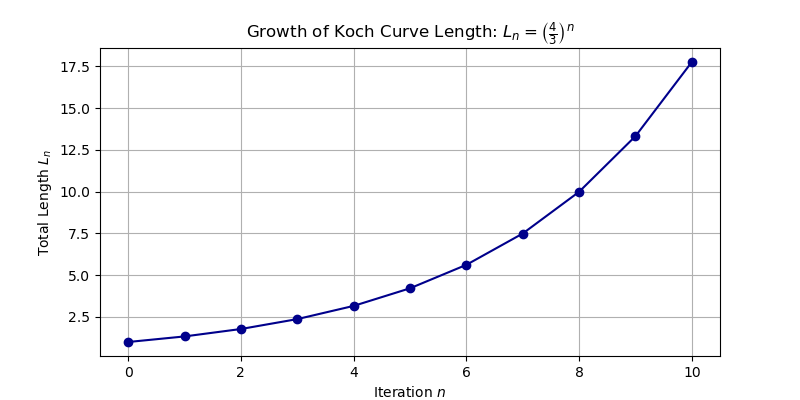

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

class kochcurve:
    @staticmethod
    def length_growth(max_iter=10):
        n_values = np.arange(0, max_iter + 1)
        L_values = (4 / 3) ** n_values  # Lₙ = (4/3)^n

        # Tabelle als DataFrame
        df = pd.DataFrame({
            "Iteration $n$": n_values,
            "Total length $L_n = (4/3)^n$": L_values
        })

        display(df)

        # Plot der Länge
        fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
        ax.plot(n_values, L_values, marker='o', linestyle='-', color='darkblue')
        ax.set_title("Growth of Koch Curve Length: $L_n = \\left(\\frac{4}{3}\\right)^n$")
        ax.set_xlabel("Iteration $n$")
        ax.set_ylabel("Total Length $L_n$")
        ax.grid(True)
        plt.show()

# === Aufruf
kochcurve.length_growth(max_iter=10)

## 4. Sierpinski Triangle – Recursive Construction and Properties

The **Sierpinski triangle** is a fractal that is formed by recursively removing the inner triangle from a larger triangle.

---

### 4.1 Geometric Construction

1. Start with an equilateral triangle.
2. Subdivide it into 4 smaller equilateral triangles by connecting the midpoints.
3. Remove the central triangle.
4. Repeat recursively for each of the 3 remaining triangles.

---

### 4.2 Properties

- With each iteration, the number of triangles triples.
- The total area **approaches zero**, as more and more is removed.
- The result is **infinitely detailed**, but still a **connected set**.

---

### 4.3 Fractal Dimension

Each step replaces a triangle with **3 scaled copies** of itself, each at **half size**:

- $N = 3$ parts
- $r = 1/2$ scaling factor

Using the self-similarity dimension formula:

$$
D = \frac{\log 3}{\log 2} \approx 1.5849
$$

This shows that the Sierpinski triangle is **more than a line**, but **less than a surface**.

interactive(children=(IntSlider(value=0, description='depth', max=8), Output()), _dom_classes=('widget-interac…

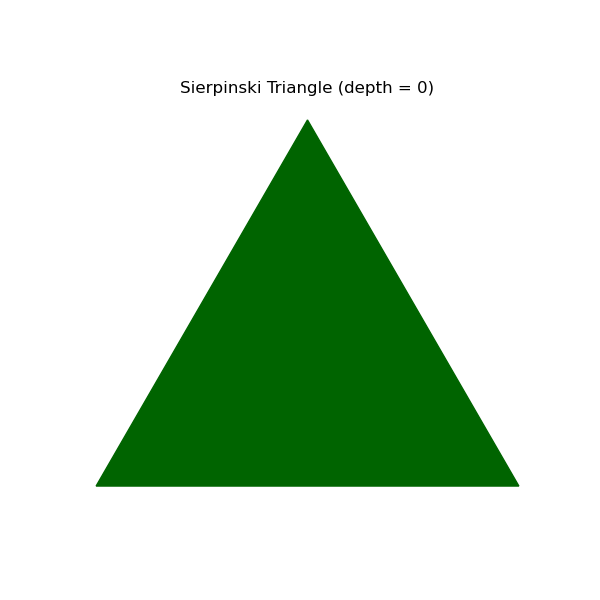

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider

from IPython.display import clear_output, display

# === Namespace für Sierpinski-Dreieck ===
class sierpinski:
    @staticmethod
    def draw_triangle(p1, p2, p3, depth, ax):
        if depth == 0:
            x = [p1[0], p2[0], p3[0]]
            y = [p1[1], p2[1], p3[1]]
            ax.fill(x, y, color='darkgreen')
        else:
            # Mittelpunkte
            m12 = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
            m23 = ((p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2)
            m31 = ((p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2)

            # Rekursion
            sierpinski.draw_triangle(p1, m12, m31, depth - 1, ax)
            sierpinski.draw_triangle(p2, m23, m12, depth - 1, ax)
            sierpinski.draw_triangle(p3, m31, m23, depth - 1, ax)

    @staticmethod
    def plot(depth):
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

        # Startdreieck (gleichseitig)
        p1 = (0, 0)
        p2 = (1, 0)
        p3 = (0.5, np.sqrt(3)/2)

        sierpinski.draw_triangle(p1, p2, p3, depth, ax)

        ax.set_title(f"Sierpinski Triangle (depth = {depth})")
        ax.set_aspect('equal')
        ax.axis('off')
        display(fig)

# === Interaktiver Slider ===
interact(sierpinski.plot, depth=IntSlider(min=0, max=8, step=1, value=0));

,Iteration $n$,Remaining Area $A_n$,Removed Area $A_0 - A_n$
0,0,0.433013,0.000000
1,1,0.324760,0.108253
2,2,0.243570,0.189443
3,3,0.182677,0.250335
4,4,0.137008,0.296005
5,5,0.102756,0.330257
6,6,0.077067,0.355946
7,7,0.057800,0.375212
8,8,0.043350,0.389663
9,9,0.032513,0.400500


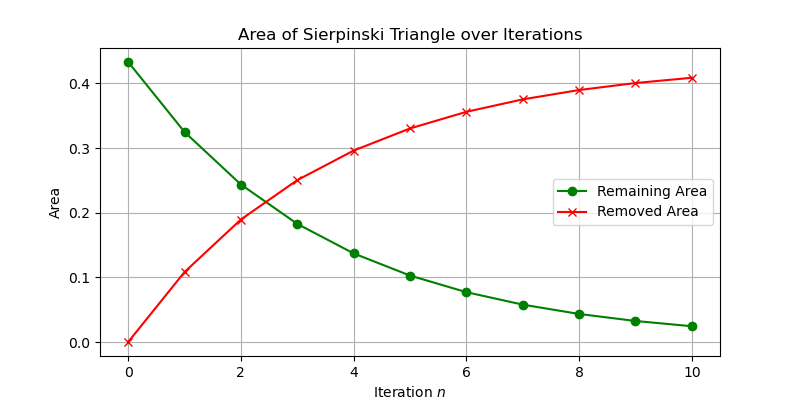

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

class sierpinski:
    @staticmethod
    def area_table(max_iter=10):
        A0 = (np.sqrt(3) / 4)  # Fläche des gleichseitigen Dreiecks mit Seitenlänge 1

        n = np.arange(0, max_iter + 1)

        # Fläche, die nach jeder Iteration entfernt wurde:
        removed_area = A0 * (1 - (3 / 4) ** n)
        remaining_area = A0 - removed_area

        df = pd.DataFrame({
            "Iteration $n$": n,
            "Remaining Area $A_n$": remaining_area,
            "Removed Area $A_0 - A_n$": removed_area
        })

        display(df)

        # Plot
        fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
        ax.plot(n, remaining_area, label="Remaining Area", marker='o', color='green')
        ax.plot(n, removed_area, label="Removed Area", marker='x', color='red')
        ax.set_title("Area of Sierpinski Triangle over Iterations")
        ax.set_xlabel("Iteration $n$")
        ax.set_ylabel("Area")
        ax.grid(True)
        ax.legend()
        plt.show()

# === Aufruf
sierpinski.area_table(max_iter=10)

In [6]:
import math

N = 3   # Anzahl selbstähnlicher Teilstücke
r = 0.5 # Skalierungsfaktor

D = math.log(N) / math.log(1/r)
print(f"Fraktale Dimension des Sierpinski-Dreiecks: D = {D:.4f}")

Fraktale Dimension des Sierpinski-Dreiecks: D = 1.5850


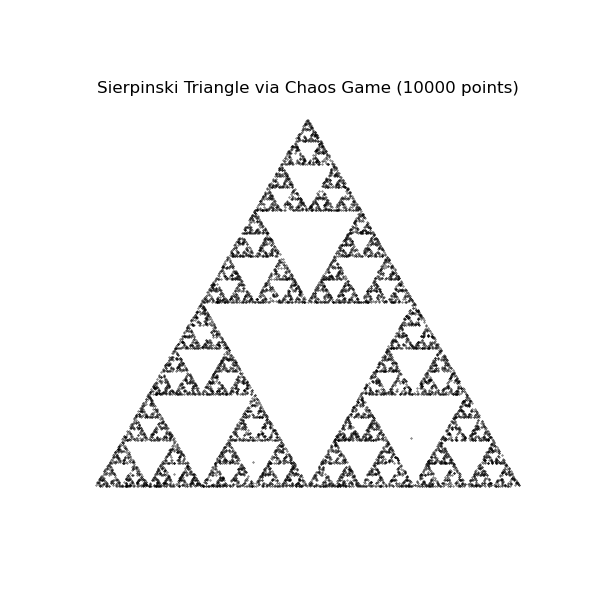

In [7]:
import matplotlib.pyplot as plt
import numpy as np

class sierpinski:
    @staticmethod
    def chaos_game(n_points=10000, point_size=0.1, color='black'):
        # Gleichseitiges Dreieck
        p1 = np.array([0, 0])
        p2 = np.array([1, 0])
        p3 = np.array([0.5, np.sqrt(3)/2])
        vertices = [p1, p2, p3]

        # Startpunkt zufällig
        current = np.random.rand(2)
        points = []

        for _ in range(n_points):
            vertex = vertices[np.random.randint(0, 3)]
            current = (current + vertex) / 2
            points.append(current)

        points = np.array(points)

        # Plot
        fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
        ax.scatter(points[:, 0], points[:, 1], s=point_size, color=color)
        ax.set_title(f"Sierpinski Triangle via Chaos Game ({n_points} points)")
        ax.set_aspect('equal')
        ax.axis('off')
        plt.show()

# === Aufruf
sierpinski.chaos_game(n_points=10000)

## 5. Cantor Set – Recursive Construction and Mathematical Properties

The **Cantor set** is one of the earliest known examples of a fractal, first introduced in 1883 by Georg Cantor.

It is defined by a **recursive removal process** applied to the interval $[0, 1]$.

---

### 5.1 Construction Steps (middle-third removal)

1. Start with the closed interval $C_0 = [0, 1]$
2. Remove the open middle third: $(1/3, 2/3)$ → now two intervals remain
3. Repeat the process on all remaining intervals: remove the middle third of each
4. Continue infinitely

After $n$ steps: $2^n$ intervals remain, each of length $(1/3)^n$

---

### 5.2 Properties

- The Cantor set is **uncountably infinite**, like the real numbers
- Yet its **total length tends to 0**
- It is **totally disconnected**: no interval remains
- It has **no isolated points** – it's a "dust" of infinite points

---

### 5.3 Fractal Dimension

Each iteration yields:

- $N = 2$ self-similar parts
- each scaled by $r = 1/3$

Using the dimension formula:

$$
D = \frac{\log 2}{\log 3} \approx 0.6309
$$

This means the Cantor set is "less than" a line, but "more than" just a few points.

In [8]:
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def cantor_rowed_with_labels(x, y, length, depth):
    if depth == 0:
        plt.plot([x, x + length], [y, y], lw=2, color='black')
    else:
        dy = 0.08
        next_y = y - dy
        cantor_rowed_with_labels(x, next_y, length / 3, depth - 1)
        cantor_rowed_with_labels(x + 2 * length / 3, next_y, length / 3, depth - 1)

def plot_cantor_labeled(depth):
    plt.figure(figsize=(10, 5 + depth * 0.4))
    dy = 0.08
    for d in range(depth + 1):
        y = -d * dy
        # Zeichne Iteration
        cantor_rowed_with_labels(0, y, 1, d)
        # Label links anzeigen
        plt.text(-0.05, y, f"n = {d}", ha='right', va='center', fontsize=10)

    plt.title(f"Cantor Set – Iterations 0 to {depth}", fontsize=14)
    plt.axis('off')
    plt.axis([ -0.1, 1, -depth * dy - 0.05, 0.1])
    plt.gca().set_aspect('auto')
    plt.show()

interact(plot_cantor_labeled, depth=IntSlider(min=0, max=12, step=1, value=0));

interactive(children=(IntSlider(value=0, description='depth', max=12), Output()), _dom_classes=('widget-intera…

,Iteration n,Total Length Lₙ
0,0,1.000000
1,1,0.666667
2,2,0.444444
3,3,0.296296
4,4,0.197531
5,5,0.131687
6,6,0.087791
7,7,0.058528
8,8,0.039018
9,9,0.026012


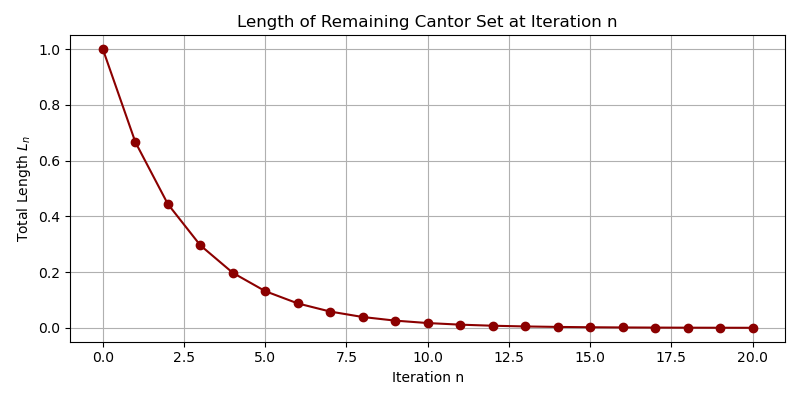

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = np.arange(0, 21)  # bis n = 20
L_n = (2 / 3) ** n    # Gesamtlänge der Intervalle

# Tabelle anzeigen
df = pd.DataFrame({
    "Iteration n": n,
    "Total Length Lₙ": L_n
})
display(df)

# Plot anzeigen
plt.figure(figsize=(8, 4))
plt.plot(n, L_n, marker='o', color='darkred')
plt.title("Length of Remaining Cantor Set at Iteration n")
plt.xlabel("Iteration n")
plt.ylabel("Total Length $L_n$")
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.4 Cantor Set and Base-3 (Ternary) Representation

There is a beautiful numerical characterization of the Cantor set:

> A number $x \in [0,1]$ is in the Cantor set **if and only if** its base-3 (ternary) expansion contains **only the digits 0 and 2**.

This means:
- If $x = 0.202000..._3$ → $x$ is in the Cantor set ✅
- If $x = 0.102200..._3$ → $x$ is **not** in the Cantor set ❌ (because of the digit 1)

---

#### Why?

At each step of the construction, we remove the **middle third** of every interval.  
In ternary, this middle third corresponds to numbers with a 1 in a specific digit place.

Thus:

- Removing $(1/3, 2/3)$ → removes numbers with 0.1... in base 3
- The remaining intervals contain only numbers with digits 0 and 2

This process continues recursively, eliminating **all numbers with any 1** in their ternary form.

---

#### Examples:

- $x = \frac{1}{4} = 0.020202..._3 \in$ Cantor set ✅  
- $x = \frac{1}{3} = 0.1_3 \notin$ Cantor set ❌  
- $x = \frac{2}{3} = 0.2_3 \in$ Cantor set ✅

So although the Cantor set has zero length,  
it still contains **uncountably many real numbers**, including **many rationals and irrationals**.

In [10]:
def to_base_3(x, precision=10):
    """Returns a string of the base-3 representation of x in [0, 1]"""
    if not (0 <= x <= 1):
        raise ValueError("x must be in [0, 1]")
    digits = []
    for _ in range(precision):
        x *= 3
        digit = int(x)
        digits.append(str(digit))
        x -= digit
    return "0." + "".join(digits)

# Beispiele
examples = [1/4, 1/3, 2/3, 0.875, 0.222]
for val in examples:
    base3 = to_base_3(val, precision=12)
    print(f"{val:.6f} → {base3}")

0.250000 → 0.020202020202
0.333333 → 0.100000000000
0.666667 → 0.200000000000
0.875000 → 0.212121212121
0.222000 → 0.012222211121


Ergebnis:
Zeigt, welche Zahlen im Cantor-Set sind (nur Ziffern 0 und 2)

Super für die mündliche oder schriftliche Erklärung im Vortrag

Verbindet geometrische Konstruktion mit Zahlentheorie

---

### 5.5 Random Cantor Check – Is a number in the Cantor set?

Although the Cantor set has no length, it still contains uncountably many numbers.  
We now test if a randomly selected number in $[0,1]$ belongs to the Cantor set.

#### Method:
A number is in the Cantor set **if and only if** its base-3 (ternary) expansion contains **no digit `1`**.

We generate a few random real numbers and check their ternary representation.

In [11]:
import random

def is_in_cantor_set(x, precision=20):
    """Check if the number x in [0,1] is in the Cantor set based on its ternary representation"""
    for _ in range(precision):
        x *= 3
        digit = int(x)
        if digit == 1:
            return False
        x -= digit
    return True

# Zufallszahlen testen
for _ in range(5):
    x = round(random.uniform(0, 1), 10)
    result = is_in_cantor_set(x)
    print(f"x = {x:.10f} → {'✔️ in Cantor set' if result else '❌ not in Cantor set'}")

x = 0.3157003365 → ❌ not in Cantor set
x = 0.0070086814 → ❌ not in Cantor set
x = 0.8727332721 → ❌ not in Cantor set
x = 0.1934052244 → ❌ not in Cantor set
x = 0.8000035796 → ❌ not in Cantor set


### 5.6 Digit Distribution in Base-3

To understand how the ternary digits behave, we randomly select a number in $[0,1]$  
and analyze the frequency of digits 0, 1 and 2 in its base-3 expansion.

This can help us see why numbers in the Cantor set are rare:  
Most real numbers have at least one `1` in their base-3 representation.

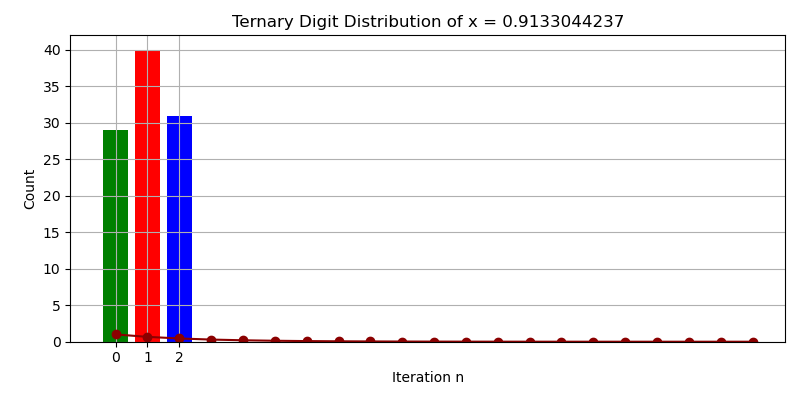

x = 0.9133044237 → ❌ not in Cantor set


In [12]:
import matplotlib.pyplot as plt

def ternary_digits(x, precision=20):
    """Gibt Liste der ersten 'precision' Ternärziffern (als ints) einer Zahl in [0,1]"""
    digits = []
    for _ in range(precision):
        x *= 3
        digit = int(x)
        digits.append(digit)
        x -= digit
    return digits

# Beispiel: Zufallszahl
x = random.uniform(0, 1)
digits = ternary_digits(x, precision=100)

# Histogramm der Ziffern
counts = [digits.count(0), digits.count(1), digits.count(2)]
plt.bar(["0", "1", "2"], counts, color=['green', 'red', 'blue'])
plt.title(f"Ternary Digit Distribution of x = {x:.10f}")
plt.ylabel("Count")
plt.show()

# Cantor-Check ausgeben
is_cantor = is_in_cantor_set(x)
print(f"x = {x:.10f} → {'✔️ in Cantor set' if is_cantor else '❌ not in Cantor set'}")

We can see that most real numbers contain a mix of 0s, 1s and 2s.  
Only very rare numbers contain **only 0s and 2s** — these are the ones that belong to the **Cantor set**.

This also explains:
- Why the Cantor set has **zero length**
- But still contains **uncountably many numbers**

---

## 6. Barnsley Fern 🌿 – Fractal via Iterated Function System (IFS)

The Barnsley fern is a famous example of a **natural-looking fractal** generated using an **Iterated Function System (IFS)**.

It consists of four affine transformations, each applied with a certain probability.

---

### 6.1 Affine Transformations

Each transformation has the form:

$$
\begin{bmatrix}
x_{n+1} \\
y_{n+1}
\end{bmatrix}
=
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\cdot
\begin{bmatrix}
x_n \\
y_n
\end{bmatrix}
+
\begin{bmatrix}
e \\
f
\end{bmatrix}
$$

By applying one of these transformations at each step (chosen by probability), the fern structure emerges.

---

### 6.2 Why it works

Although each transformation is simple,  
the combination and recursion create a shape that **closely resembles a real plant**.

This is an example of **fractals in nature**.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider

# Parameterliste: a, b, c, d, e, f, probability
fern_rules = [
    [0.00,  0.00,  0.00, 0.16, 0.00, 0.00, 0.01],
    [0.85,  0.04, -0.04, 0.85, 0.00, 1.60, 0.85],
    [0.20, -0.26,  0.23, 0.22, 0.00, 1.60, 0.07],
    [-0.15, 0.28,  0.26, 0.24, 0.00, 0.44, 0.07]
]

def barnsley_fern(n_points=50000):
    x, y = 0, 0
    x_vals, y_vals = [], []

    for _ in range(n_points):
        r = np.random.random()
        cumulative = 0
        for rule in fern_rules:
            a, b, c, d, e, f, prob = rule
            cumulative += prob
            if r <= cumulative:
                x_new = a * x + b * y + e
                y_new = c * x + d * y + f
                x, y = x_new, y_new
                break
        x_vals.append(x)
        y_vals.append(y)

    plt.figure(figsize=(6, 10))
    plt.scatter(x_vals, y_vals, s=0.1, color='green')
    plt.title(f"Barnsley Fern – {n_points} points")
    plt.axis('off')
    plt.show()

interact(barnsley_fern, n_points=IntSlider(min=1000, max=100000, step=1000, value=20000));

interactive(children=(IntSlider(value=20000, description='n_points', max=100000, min=1000, step=1000), Output(…

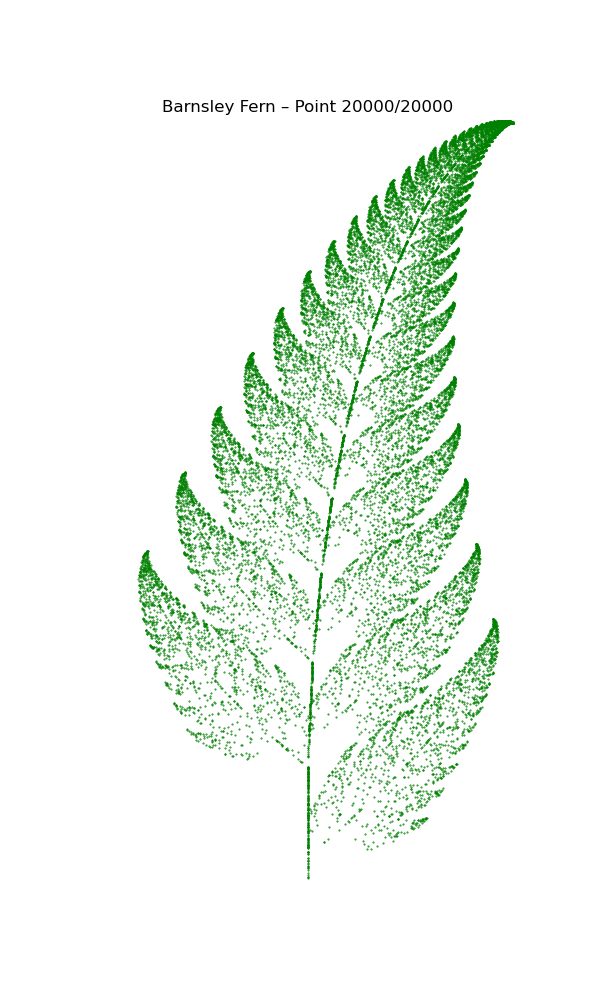

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

# IFS-Parameter
fern_rules = [
    [0.00,  0.00,  0.00, 0.16, 0.00, 0.00, 0.01],
    [0.85,  0.04, -0.04, 0.85, 0.00, 1.60, 0.85],
    [0.20, -0.26,  0.23, 0.22, 0.00, 1.60, 0.07],
    [-0.15, 0.28,  0.26, 0.24, 0.00, 0.44, 0.07]
]

def barnsley_fern_notebook(n_points=1000, refresh_every=100):
    x, y = 0, 0
    x_vals, y_vals = [], []

    for i in range(n_points):
        r = np.random.random()
        cumulative = 0
        for rule in fern_rules:
            a, b, c, d, e, f, prob = rule
            cumulative += prob
            if r <= cumulative:
                x_new = a * x + b * y + e
                y_new = c * x + d * y + f
                x, y = x_new, y_new
                break

        x_vals.append(x)
        y_vals.append(y)

        # alle paar Schritte neu anzeigen
        if i % refresh_every == 0 or i == n_points - 1:
            clear_output(wait=True)
            plt.figure(figsize=(6, 10))
            plt.scatter(x_vals, y_vals, s=0.2, color='green')
            plt.title(f"Barnsley Fern – Point {i+1}/{n_points}")
            plt.axis('off')
            plt.xlim(-3, 3)
            plt.ylim(0, 10)
            plt.show()
            time.sleep(0.01)  # optional: minimale Verzögerung

# Aufruf im Notebook:
barnsley_fern_notebook(n_points=20000, refresh_every=100)

# 🧠 Chapter 7: The Mandelbrot Set – Complex Dynamics and Fractal Boundaries

---

## 📘 7.1 What is the Mandelbrot Set?

The **Mandelbrot set** is the set of complex numbers $c \in \mathbb{C}$ for which the sequence

$$
z_0 = 0 \\
z_{n+1} = z_n^2 + c
$$

remains **bounded** (i.e., does not escape to infinity).

Although the formula is simple, the resulting structure is one of the most iconic and complex objects in mathematics.

---

## 🔁 7.2 Iteration Principle & Escape Test

We start with $z_0 = 0$ and apply the iteration $z_{n+1} = z_n^2 + c$ repeatedly.

In practice, we stop after a fixed number of iterations (e.g., 100–1000)  
and check whether the magnitude $|z_n|$ has exceeded 2.

**If $|z_n| > 2$ at any point → the sequence will diverge → $c \notin \mathcal{M}$.**  
Otherwise, we assume that **$c \in \mathcal{M}$**.

---

## 📐 7.3 Formal Definition

The Mandelbrot set $\mathcal{M}$ is defined as:

$$
\mathcal{M} = \left\{ c \in \mathbb{C} \mid \sup_n |z_n| < \infty \right\}
$$

This means that $c$ belongs to the Mandelbrot set if the iterated values $z_n$ do not diverge as $n \to \infty$.

---

## ❓ 7.4 Why the Escape Radius is 2

It can be mathematically proven that:

> If $|z_n| > 2$ at any point, the sequence will escape to infinity.

That’s why nearly all implementations use **2 as the escape threshold**.

---

## 📏 7.5 What does “bounded” mean?

A sequence $(z_n)$ is called **bounded** if there exists a number $M$ such that:

$$
|z_n| < M \quad \text{for all } n
$$

In the case of the Mandelbrot set, we simply check whether $|z_n|$ stays below 2.  
If it does (within a reasonable number of iterations), we say the sequence is **bounded**.

---

## 🌐 7.6 Geometry and Structure

The Mandelbrot set has a stunning and highly detailed structure:

- A central cardioid ("heart shape")
- Infinite spiraling satellite bulbs
- Countless self-similar structures and miniature Mandelbrot copies

Zooming in reveals **infinite complexity** and **fractal boundaries**.  
Despite being defined by a very simple rule, the result is an incredibly rich mathematical object.

---

## 🔗 7.7 Connection to Julia Sets

Every complex number $c$ defines a unique **Julia set** using the same recurrence relation:

$$
z_{n+1} = z_n^2 + c
$$

But now, $c$ is fixed, and $z_0$ varies.

**Relation to the Mandelbrot set**:

- If $c \in \mathcal{M}$ → the Julia set is **connected**
- If $c \notin \mathcal{M}$ → the Julia set is **disconnected ("dust")**

So the Mandelbrot set acts as a **map of Julia sets**, indicating for which parameters the Julia set is connected.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def mandelbrot(max_iter):
    # Fix definierte Auflösung – nur hier anpassen
    resolution_x = 1200
    resolution_y = 600

    x_min, x_max = -2.5, 1.5
    y_min, y_max = -1.5, 1.5

    x = np.linspace(x_min, x_max, resolution_x)
    y = np.linspace(y_min, y_max, resolution_y)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C)
    divergence_time = np.full(C.shape, max_iter, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask]**2 + C[mask]
        escaped = (np.abs(Z) > 2) & (divergence_time == max_iter)
        divergence_time[escaped] = i

    # exakte Bildgröße in Pixeln
    dpi = 100
    figsize = (resolution_x / dpi, resolution_y / dpi)

    plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(divergence_time, extent=(x_min, x_max, y_min, y_max),
               cmap='twilight_shifted', origin='lower', aspect='auto')
    plt.title(f"Mandelbrot Set {resolution_x}×{resolution_y}, max_iter = {max_iter}")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.colorbar(label="Escape-Time")
    plt.show()

# Nur Interaktivität für max_iter
interact(
    mandelbrot,
    max_iter=IntSlider(min=10, max=500, step=10, value=100, description="Max Iter")
);


interactive(children=(IntSlider(value=100, description='Max Iter', max=500, min=10, step=10), Output()), _dom_…

---

## 🧮 7.8 Mandelbrot Set Visualization – Escape-Time Algorithm

This code uses the **escape-time method** to visualize the Mandelbrot set.

### 🧠 Explanation

We define a complex grid of values $c = x + iy$ over a rectangular region of the complex plane.

Then, for each point $c$, we iterate:

$$
z_0 = 0, \quad z_{n+1} = z_n^2 + c
$$

We track the number of iterations it takes for $|z_n|$ to exceed 2.  
This number is used as a **color value** for that point.

If $|z_n|$ never exceeds 2 (within the iteration limit), we assume the point is part of the Mandelbrot set.

---

### 📊 Escape-Time Coloring

- **Bright colors**: Points that escape quickly (not in the set)
- **Dark colors**: Points near the boundary or within the Mandelbrot set
- **Max iterations**: Controls the level of detail / depth of computation

---

### 📌 Key Variables

- `max_iter`: maximum number of iterations before escape
- `width`, `height`: resolution of the image
- `x_min`, `x_max`, `y_min`, `y_max`: window of the complex plane
- `c`: complex number to test
- `Z`: current state of the iteration
- `divergence_time`: stores how many iterations each point survived before escaping

---